1. Annotate w/ laclip 
2. Annotate w/ reason for pathology missing 
3. annotate for the reason that the imaging might be missing
4. Substitution of 0's for NA's, Annotate those substitutions, find where quant failed for perf
5. Annotates for inclusion of modalities 
6. Imputes b1000 data from b2000 using linear modeling 
7. Adds in output from get_igt_stats.ipynb, w/ %CEL, NEL, NEC & inclusion criteria (can be found in DataWrangling/GetMergeData/)
8. Excludes ependymomas and other non-astro non-oligo HGGs (desired_hist) 
9. Creates outcome labels (multnom_out), adds necrosis, makes PN category (pathologically normal) that are in CEL or in the NEL region labeled TxE  
12. Adds in binary operator to include the data only if it's rHGG or TxE 


In [1]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

## 1. LacLip Annotation

In [2]:
getwd()

[1] "/home/sf673542/DataWrangling/AnnotateData"

In [3]:
all_recgli = read.csv("../GetMergeData/July2018/researchPath_withInVivoData.csv")
dim(all_recgli)

[1] 644  45

In [4]:
laclip = ifelse(all_recgli$nlac == all_recgli$nlip, 1, 0)
table(laclip)
laclip_values = ifelse(laclip==1, all_recgli$nlac, all_recgli$nlac+all_recgli$nlip)
all_recgli = data.frame(all_recgli[,c(1:42)], laclip = laclip_values, all_recgli[,c(43:dim(all_recgli)[2])])
## making indeterminable shorter: 
all_recgli$tumor_cell_evaluation = gsub("Indeterminable", "Ind", all_recgli$tumor_cell_evaluation)
dim(all_recgli)

laclip
  0   1 
125 179 

[1] 644  46

In [5]:
colnames(all_recgli)

[1] "b_number"                 "t_number"                
 [3] "sf_number"                "current_scan_date"       
 [5] "current_surgery_date"     "current_hist_grade"      
 [7] "current_hist_type"        "roi.label"               
 [9] "tumor_cell_evaluation"    "necrosis"                
[11] "f8_delicate"              "f8_simple"               
[13] "f8_complex"               "mib_1"                   
[15] "bx_pure_treatment_effect" "nfse"                    
[17] "nfl"                      "nt1c"                    
[19] "nt1v"                     "nadc.1"                  
[21] "nfa.1"                    "nev1.1"                  
[23] "nev2.1"                   "nev3.1"                  
[25] "nevrad.1"                 "nadc.2"                  
[27] "nfa.2"                    "nev1.2"                  
[29] "nev2.2"                   "nev3.2"                  
[31] "nevrad.2"                 "cbvn_nlin"               
[33] "phn_nlin"                 "phn_npar"                
[35] "recovn_npar"              "cni"                     
[37] "ccri"                     "crni"                    
[39] "ncho"                     "ncre"                    
[41] "nnaa"                     "nlip"                    
[43] "laclip"                   "nlac"                    
[45] "olddata"                  "newdata"

In [6]:
write.csv(all_recgli, file = "Annot1_researchPath_withInVivoData.csv", row.names = F)

## 2. Pathology Comments For Outcome Determination

In [7]:
all_recgli = read.csv("Annot1_researchPath_withInVivoData.csv")

Here we have to go & download most recent pathology comment reports from cerebro. 
Go to https://braino.radiology.ucsf.edu/ncvi/secure/clinical/search/AdvancedSearch2.do?cid=5

1. For old data, click Search Criteria = Study tag equals P01_PREOP_REC
2. Under "Tissue Samples (Research)" Click "Tissue Bank Vial ID" 
3. Under "Pathology Events (Research)" Click "Pathology Comments" 
4. Click the green button to download, save as path_comments_oldP01.csv, & upload to CWD 
5. Repeat for new data, with Search Criteria = Study tag equals REC_HGG, save as path_comments_RECHGG.csv 

In [8]:
oldpathcomments = read.csv("path_comments_oldP01.csv")
newpathcomments = read.csv("path_comments_RECHGG.csv")
dim(oldpathcomments)
dim(newpathcomments)

[1] 371   2

[1] 417   2

Previously I had looked at old spreadsheets and determined that there was no FFPE tissue and I annotated that in a file called no_path_in_data.csv. I moved that to CWD and will upload now: 

In [9]:
no_ffpe_determination_by_julia = read.csv("no_path_in_data.csv")
colnames(no_ffpe_determination_by_julia)[4]="roi.label"
colnames(oldpathcomments)=c('roi.label', 'comments')
colnames(newpathcomments)=c('roi.label', 'comments')

In [10]:
allpathcomments = rbind(oldpathcomments, newpathcomments)
dim(allpathcomments)
allpathcomments[,1]=as.character(allpathcomments[,1])
all_recgli$roi.label=as.character(all_recgli$roi.label)

[1] 788   2

In [11]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [12]:
table(duplicated(allpathcomments$roi.label))
which(duplicated(allpathcomments))
allpathcomments=allpathcomments[-which(duplicated(allpathcomments)),]
dim(allpathcomments)


FALSE  TRUE 
  675   113 

[1] 373 374 375 376 377 382 386 391 392 395 400 401 405 406 409 414 419 420
 [19] 423 428 431 435 439 442 446 450 453 456 460 465 470 474 478 482 484 488
 [37] 493 497 501 509 511 516 517 518 521 525 528 537 542 545 550 555 559 563
 [55] 568 571 576 581 586 587 592 595 600 605 612 617 626 631 634 638 647 649
 [73] 650 655 664 665 666 667 668 671 675 679 682 687 692 697 702 703 706 711
 [91] 714 718 721 724 727 731 733 736 741 746 747 752 757 760 761 766 770 773
[109] 777 780 785 786 788

[1] 675   2

In [13]:
recgli.withpathcommments = left_join(all_recgli, allpathcomments, by = "roi.label")

In [14]:
dim(recgli.withpathcommments)

[1] 644  47

In [15]:
table(duplicated(no_ffpe_determination_by_julia$roi.label))
recgli = left_join(recgli.withpathcommments, no_ffpe_determination_by_julia[,c(4,8)], by = "roi.label")


FALSE 
   77 

Warning message:
“Column `roi.label` joining character vector and factor, coercing into character vector”

In [16]:
dim(recgli)

[1] 644  48

In [17]:
write.csv(recgli, "2ndAnnot_researchPath_withInVivo.csv", row.names=F)

## 3. Reason that Imaging is Missing 

In [18]:
all_recgli = read.csv("2ndAnnot_researchPath_withInVivo.csv")

Remove the spaces in the roi.label column in order to match our vialIDs from the missingDataReasons

In [19]:
all_recgli$roi.label = gsub(" ", "", as.character(all_recgli$roi.label))

Earlier I had written up why imaging was missing for old data and for new data. I copied the files called "REC_HGG_missingImagingNotes.csv" and "olddata_Nelson_missingDataReasons.csv" to this directory.

In [20]:
new_missingImaging = read.csv("REC_HGG_missingImagingNotes.csv")
old_missingImaging = read.csv("oldData_Nelson_missingDataReasons.csv")
head(old_missingImaging)

tnum,vial_id,consent_issue,screenshot_issue,biopsy_quant_issue,screenshots_missing.
5251,none,1,0,0,t5934
5934,7909T1,0,1,0,t5970
5934,7909T2,0,1,0,t6024
5934,7909T3,0,1,0,t6127
5970,none,1,1,0,t6148
6024,none,1,1,0,t6366


In [21]:
## we want a vector containing an imaging reason code for not being there that is 622 biopsies long
## scrn = no screenshots 
## tiss_cons = no tissue taken or no consent 
## biopsy_quant = biopsy quantification issue 
## beginning with old information: 

imaging_code = rep(NA, dim(all_recgli)[1])
## creating imaging code to get rid of things: 
for (j in 1:dim(old_missingImaging)[1]){
  ## first check to make sure that it is in the merge data frame t
  if (as.character(old_missingImaging$vial_id[j]) %in% all_recgli$roi.label){
    ## if it is in the data frame, let's match the vialIDs
    index_in_all_recgli = match(old_missingImaging$vial_id[j], all_recgli$roi.label)
    ## now we have to find out why it  has no imaging: 
    if(old_missingImaging$consent_issue[j]==1){
      imaging_code[index_in_all_recgli] = "tiss_cons"
    } else if (old_missingImaging$screenshot_issue[j]==1){
      imaging_code[index_in_all_recgli] = "scrn"
    } else if (old_missingImaging$biopsy_quant_issue[j]==1){
      imaging_code[index_in_all_recgli] = 'biopsy_quant'
    }
  }
  ## if not in merge data frame, i guess just skip? 
}
table(imaging_code)

imaging_code
biopsy_quant         scrn    tiss_cons 
          23           38            3 

In [22]:
for (j in 1:dim(new_missingImaging)[1]){
  ## first check to make sure that it is in the all_recgli data frame t
  if (new_missingImaging$tnum[j] %in% all_recgli$t_number){
    ## if it is in the data frame, let's match the vialIDs
    indexes_in_all_recgli = which(all_recgli$t_number == new_missingImaging$tnum[j])
    ## now we have to find out why it  has no imaging: 
    if(new_missingImaging$tissue_consent[j]==1){
      imaging_code[indexes_in_all_recgli] = "tiss_cons"
    } else if (new_missingImaging$screenshots_unavailable[j]==1){
      imaging_code[indexes_in_all_recgli] = "scrn"
    } 
  }
  ## if not in merge data frame, i guess just skip? 
}
table(imaging_code)

imaging_code
biopsy_quant         scrn    tiss_cons 
          23           51           19 

In [23]:
all_recgli= data.frame(all_recgli, imaging_code = imaging_code)

In [24]:
dim(all_recgli)
colnames(all_recgli)

[1] 644  49

[1] "b_number"                 "t_number"                
 [3] "sf_number"                "current_scan_date"       
 [5] "current_surgery_date"     "current_hist_grade"      
 [7] "current_hist_type"        "roi.label"               
 [9] "tumor_cell_evaluation"    "necrosis"                
[11] "f8_delicate"              "f8_simple"               
[13] "f8_complex"               "mib_1"                   
[15] "bx_pure_treatment_effect" "nfse"                    
[17] "nfl"                      "nt1c"                    
[19] "nt1v"                     "nadc.1"                  
[21] "nfa.1"                    "nev1.1"                  
[23] "nev2.1"                   "nev3.1"                  
[25] "nevrad.1"                 "nadc.2"                  
[27] "nfa.2"                    "nev1.2"                  
[29] "nev2.2"                   "nev3.2"                  
[31] "nevrad.2"                 "cbvn_nlin"               
[33] "phn_nlin"                 "phn_npar"                
[35] "recovn_npar"              "cni"                     
[37] "ccri"                     "crni"                    
[39] "ncho"                     "ncre"                    
[41] "nnaa"                     "nlip"                    
[43] "laclip"                   "nlac"                    
[45] "olddata"                  "newdata"                 
[47] "comments"                 "notes."                  
[49] "imaging_code"

In [25]:
get_imaging = all_recgli[is.na(all_recgli$imaging_code) & is.na(all_recgli$nfse) & all_recgli$newdata==1 ,c("b_number", "t_number","sf_number", "roi.label")]
dim(get_imaging) #16 4


[1] 21  4

In [26]:
for(i in 1:dim(get_imaging)[1]){
  ## want to add imaging_code "biopsy_quant" to those vialIDs in get_imaging1
  index = match(get_imaging$roi.label[i], all_recgli$roi.label)
  all_recgli$imaging_code[index]= "biopsy_quant"
}
table(all_recgli$imaging_code)


biopsy_quant         scrn    tiss_cons 
          33           51           18 

In [27]:
all_recgli$imaging_code[is.na(all_recgli$imaging_code) & is.na(all_recgli$nfse) ]="biopsy_quant"
table(all_recgli$imaging_code)
table(is.na(all_recgli$nfse))
all_recgli[which(all_recgli$imaging_code == "biopsy_quant"),]


biopsy_quant         scrn    tiss_cons 
          48           51           18 


FALSE  TRUE 
  527   117 

,b_number,t_number,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,roi.label,tumor_cell_evaluation,necrosis,f8_delicate,f8_simple,f8_complex,mib_1,bx_pure_treatment_effect,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,nadc.2,nfa.2,nev1.2,nev2.2,nev3.2,nevrad.2,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,olddata,newdata,comments,notes.,imaging_code
3,2901,8089,8403,6/25/10,6/30/10,Grade IV,Glioblastoma,11B35,3,2,1,0,0,NA,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,biopsymask-nonexist,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,biopsy_quant
9,2901,8089,8403,6/25/10,6/30/10,Grade IV,Glioblastoma,12B35,3,0,1,2,0,19.00,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,biopsymask-nonexist,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,biopsy_quant
12,2901,8089,8403,6/25/10,6/30/10,Grade IV,Glioblastoma,13B35,0,2,1,0,0,NA,t,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,biopsymask-nonexist,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,biopsy_quant
29,3012,7111,8521,10/18/10,10/19/10,Grade III,Oligodendroglioma,1B38,2,0,2,0,0,0.75,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,biopsymask-nonexist,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,oligo,NA,biopsy_quant
30,3207,7658,8896,9/19/11,9/20/11,Grade IV,Glioblastoma,1B45,3,0,0,3,0,31.36,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,biopsy_quant
40,2571,7444,8722,4/14/11,4/15/11,Grade IV,Glioblastoma,23B42,1,0,3,0,0,8.38,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,biopsymask-nonexist,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,biopsy_quant
42,2571,7444,8722,4/14/11,4/15/11,Grade IV,Glioblastoma,24B42,2,0,3,1,0,35.41,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,biopsymask-nonexist,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,biopsy_quant
43,2571,7444,8722,4/14/11,4/15/11,Grade IV,Glioblastoma,25B42,0,0,2,0,0,0.00,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,biopsymask-nonexist,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,biopsy_quant
54,3012,7111,8521,10/18/10,10/19/10,Grade III,Oligodendroglioma,2B38,3,0,2,1,0,2.04,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,biopsymask-nonexist,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,biopsy_quant
55,2939,7527,8786,6/10/11,6/12/11,Grade IV,Glioblastoma,2B43,3,0,3,1,0,33.84,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,biopsy_quant


In [28]:
write.csv(all_recgli, "3rdAnnot_researchPath_withInVivo.csv", row.names = F)

## 4. Substitution of 0's for NA's, Annotate those substitutions, find where quant failed for perf

Since 0's mess up averages of different things, and they result from not properly quantitating the imaging parameters, we must eliminate them. However, these are indications of improper biopsy_quant problems, so we must annotate those before labeling them as NA. 

In [29]:
recgli = read.csv("3rdAnnot_researchPath_withInVivo.csv")

Perfusion: 

In [30]:
recgli = data.frame(recgli, perf_quant = recgli$phn_nlin)

In [31]:
dim(recgli)

[1] 644  50

In [32]:
recgli$perf_quant = gsub("[[:digit:]]", "", as.character(recgli$perf_quant))
recgli$perf_quant = gsub("^.$", "", as.character(recgli$perf_quant))

In [33]:
table(recgli$perf_quant)


                        biopsymask-nonexist   perf_align-nonexist 
                  314                    30                    30 
    PERF_BIOPSY_ISSUE t_B_outside_perfusion 
                    2                     9 

In [34]:
library(stringr)

In [35]:
recgli$phn_nlin = recgli$phn_nlin %>% str_replace_all("_", "") %>% str_replace_all("-", "") %>% str_replace_all("[:alpha:]", "")

In [36]:
recgli$phn_nlin = as.numeric(recgli$phn_nlin)
recgli$phn_nlin = ifelse(recgli$phn_nlin > 100000, NA, recgli$phn_nlin)

In [37]:
table(recgli$perf_quant)


                        biopsymask-nonexist   perf_align-nonexist 
                  314                    30                    30 
    PERF_BIOPSY_ISSUE t_B_outside_perfusion 
                    2                     9 

In [38]:
## here we're labeling perf_quant = 1 for those that have all zeros 
recgli$perf_quant[which(recgli$cbvn_nlin==0 &
                      recgli$phn_npar==0 & recgli$recovn_npar==0)] = "all_zeros"

In [39]:
table(recgli$perf_quant)


                                  all_zeros   biopsymask-nonexist 
                  269                    45                    30 
  perf_align-nonexist     PERF_BIOPSY_ISSUE t_B_outside_perfusion 
                   30                     2                     9 

In [40]:
## we also want to label perf_quant =1 if there is an extreme value: 
recgli$perf_quant[which(recgli$cbvn_nlin > 20)]="extreme_value"
recgli$perf_quant[which(recgli$phn_npar > 20)]="extreme_value"

In [41]:
recgli$perf_quant[is.na(recgli$perf_quant)]="noPerf_or_makePerfIssue"

In [42]:
table(recgli$perf_quant)


                                      all_zeros     biopsymask-nonexist 
                    269                      45                      30 
          extreme_value noPerf_or_makePerfIssue     perf_align-nonexist 
                      1                     258                      30 
      PERF_BIOPSY_ISSUE   t_B_outside_perfusion 
                      2                       9 

In [43]:
## Now we want to substitute zero's for NAs where perf_quant has string value: 
colnames(recgli)

[1] "b_number"                 "t_number"                
 [3] "sf_number"                "current_scan_date"       
 [5] "current_surgery_date"     "current_hist_grade"      
 [7] "current_hist_type"        "roi.label"               
 [9] "tumor_cell_evaluation"    "necrosis"                
[11] "f8_delicate"              "f8_simple"               
[13] "f8_complex"               "mib_1"                   
[15] "bx_pure_treatment_effect" "nfse"                    
[17] "nfl"                      "nt1c"                    
[19] "nt1v"                     "nadc.1"                  
[21] "nfa.1"                    "nev1.1"                  
[23] "nev2.1"                   "nev3.1"                  
[25] "nevrad.1"                 "nadc.2"                  
[27] "nfa.2"                    "nev1.2"                  
[29] "nev2.2"                   "nev3.2"                  
[31] "nevrad.2"                 "cbvn_nlin"               
[33] "phn_nlin"                 "phn_npar"                
[35] "recovn_npar"              "cni"                     
[37] "ccri"                     "crni"                    
[39] "ncho"                     "ncre"                    
[41] "nnaa"                     "nlip"                    
[43] "laclip"                   "nlac"                    
[45] "olddata"                  "newdata"                 
[47] "comments"                 "notes."                  
[49] "imaging_code"             "perf_quant"

In [44]:
recgli$cbv_nlin[grep("[[:alpha:]]", recgli$perf_quant)]=NA 
recgli$phn_nlin[grep("[[:alpha:]]", recgli$perf_quant)]=NA 
recgli$phn_npar[grep("[[:alpha:]]", recgli$perf_quant)]=NA 
recgli$recovn_npar[grep("[[:alpha:]]", recgli$perf_quant)]=NA 

Spectroscopy: 

In [45]:
recgli = data.frame(recgli, spec_quant = NA)

In [46]:
## here we're labeling perf_quant = 1 for those that have all zeros 
recgli$spec_quant = ifelse(recgli$cni==0 &
                      recgli$ccri==0 & recgli$nnaa==0 & 
                           recgli$ncho ==0 & recgli$ncre ==0, 1,0)
table(recgli$spec_quant)
table(is.na(recgli$spec_quant))


  0   1 
260  44 


FALSE  TRUE 
  304   340 

In [47]:
recgli$cni[which(recgli$spec_quant==1)]=NA
recgli$ccri[which(recgli$spec_quant==1)]=NA
recgli$crni[which(recgli$spec_quant==1)]=NA
recgli$ncho[which(recgli$spec_quant==1)]=NA
recgli$ncre[which(recgli$spec_quant==1)]=NA
recgli$nnaa[which(recgli$spec_quant==1)]=NA
recgli$nlac[which(recgli$spec_quant==1)]=NA
recgli$nlip[which(recgli$spec_quant==1)]=NA
recgli$laclip[which(recgli$spec_quant==1)]=NA

In [48]:
## We also want to know - how many of these had all biopsies fail per patient, 
## versus how many have individual biopsies that fail next to biopsies whose quantification succeeded? 

## NOTE: Follow up with this later. 

In [49]:
write.csv(recgli, file = "4thAnnot_researchPath_withInVivo.csv", row.names=F)

In [50]:
data.frame(index = 1:length(colnames(recgli)), colnames = colnames(recgli))

index,colnames
1,b_number
2,t_number
3,sf_number
4,current_scan_date
5,current_surgery_date
6,current_hist_grade
7,current_hist_type
8,roi.label
9,tumor_cell_evaluation
10,necrosis


In [51]:
## Janine requests to know where perf quantification failed. Let's write that out for her: 
write.csv(recgli[which(recgli$perf_quant>0),c(1, 2, 3, 8, 49)], file = "perf_failed_to_janine.csv", row.names = F)

## 5. Annotate with inclusion binary codes: 

In [52]:
all_recgli = read.csv("4thAnnot_researchPath_withInVivo.csv")
dim(all_recgli)

[1] 644  52

In [53]:
## now want to add binary operators of whether to include them 
imaging_issue = ifelse(is.na(all_recgli$imaging_code), 0, 1)
dim(all_recgli[imaging_issue==0,])
# [1] 527  50
table(is.na(all_recgli$nfse[imaging_issue==0]))

[1] 527  52


FALSE 
  527 

In [54]:
# FALSE 527
## so similar to our old data frame
include_anat = ifelse(is.na(all_recgli$nfse), 0, 1)
include_diffu1000 = ifelse(is.na(all_recgli$nadc.1) & is.na(all_recgli$nfa.1), 0, 1)
include_diffu2000 = ifelse(is.na(all_recgli$nadc.2) & is.na(all_recgli$nfa.2), 0, 1)
include_diffu_all = ifelse(include_diffu1000 == 1 | include_diffu2000 ==1, 1, 0)
include_perf = ifelse(grepl("[[:alpha:]]", all_recgli$perf_quant), 0, 1)
include_spec = ifelse(is.na(all_recgli$cni), 0, 1)

In [55]:
all_recgli.withbin = data.frame(all_recgli, include_anat=include_anat, include_diffu1000=include_diffu1000, 
                            include_diffu2000 = include_diffu2000, include_diffu_all = include_diffu_all, 
                            include_perf = include_perf, include_spec = include_spec)
all_recgli = all_recgli.withbin

one_advanced_mod = ifelse(include_diffu_all ==1 | include_perf == 1 | include_spec ==1, 1, 0)
include_one_advanced_mod = ifelse(include_anat == 1 & (include_diffu_all ==1 | include_perf == 1 | include_spec ==1) , 1, 0)
table(include_one_advanced_mod)
#   0   1 
# 118  521
all_recgli = data.frame(all_recgli, include_one_advanced_mod)
include_all_advanced_mods = ifelse(include_anat ==1 & include_diffu_all ==1 & include_perf == 1 & include_spec, 1, 0)
table(include_all_advanced_mods)
#  0   1 
# 445 194
all_recgli = data.frame(all_recgli, include_all_advanced_mods)

include_one_advanced_mod
  0   1 
123 521 

include_all_advanced_mods
  0   1 
511 133 

In [56]:
write.csv(all_recgli, "5thAnnot_researchPath_withInVivoData.csv", row.names = F)

write.csv(all_recgli[all_recgli$tumor_cell_evaluation=="", c("t_number", "roi.label", "notes.")],file = "path_to_joanna.csv")

## 6. Imputing b1000 data from b2000 data:

In [57]:
recgli = read.csv("5thAnnot_researchPath_withInVivoData.csv")
dim(recgli)

[1] 644  60

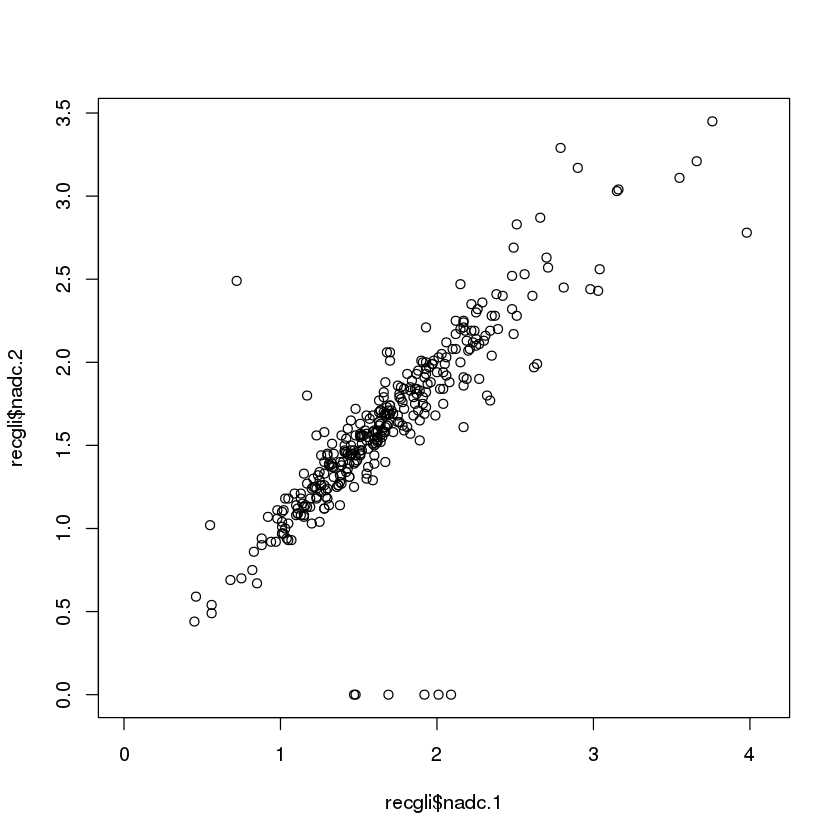

In [58]:
plot(recgli$nadc.1, recgli$nadc.2)

We want to create the most accurate linear approximation as possible, so we must remove the points for which it is clear that b=2000 quantification output a zero when it should have output a different number: 

In [59]:
recgli[which(recgli$nadc.2 ==0),]$nadc.2 = NA 
recgli[which(recgli$nfa.2 ==0),]$nfa.2 = NA 
recgli[which(recgli$nev1.2==0),]$nev1.2 = NA
recgli[which(recgli$nev2.2==0),]$nev2.2 = NA
recgli[which(recgli$nev3.2==0),]$nev3.2 = NA
recgli[which(recgli$nevrad.2==0),]$nevrad.2 = NA

In [60]:
recgli[which(recgli$nadc.1 < 1 & recgli$nadc.2 > 2),]$nadc.2 = NA

In [61]:
diffu.fit = lm(nadc.1~nadc.2, data = recgli)
summary(diffu.fit)


Call:
lm(formula = nadc.1 ~ nadc.2, data = recgli)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67296 -0.08661 -0.00908  0.06850  1.11865 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02755    0.03391  -0.812    0.417    
nadc.2       1.03917    0.01978  52.543   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1741 on 330 degrees of freedom
  (312 observations deleted due to missingness)
Multiple R-squared:  0.8932,	Adjusted R-squared:  0.8929 
F-statistic:  2761 on 1 and 330 DF,  p-value: < 2.2e-16


In [62]:
nadc1from2 = predict(diffu.fit, newdata = recgli[which(is.na(recgli$nadc.1) & !is.na(recgli$nadc.2)),])
nadc1from2

292       295       298       333       334       335       397       398 
1.6143442 1.6766946 1.9468799 2.0300138 1.3857259 1.5416020 1.4688598 1.8949212 
      399       402       403       404       405       406       407       408 
1.4480764 1.3025920 1.6766946 1.1674994 1.1363242 1.6559112 1.3025920 1.6766946 
      409       410       411       412       413       432       433       434 
1.4688598 2.6015595 2.6119512 1.8221790 2.2898073 0.6479124 1.0531903 1.3025920 
      435       452       453       454       455       487       488       489 
1.5727772 1.7910038 1.7182616 1.6143442 1.7910038 0.9908398 1.8949212 1.4896433 
      490       502       503       504       505       507       527       528 
1.9157047 1.6766946 1.1051490 1.3649425 1.7702203 2.2794155 1.1155407 1.6974781 
      529       530       545       546       547       594       595       596 
1.1155407 1.3129838 1.7286533 1.5000351 1.1986746 1.3025920 1.1467159 1.0531903 
      597       598       631       632       633       634 
0.7414381 1.4376846 1.8949212 1.9676633 1.8013955 1.9780551

In [63]:
## so we've created a list of predicted values, whose 'names' should be the same as the row numbers in the data frame that we want to add it to
## for sanity check: recgli$nadc.1[match(names(nadc1from2), rownames(recgli))]=nadc1from2
recgli[631,]
## yep, looks like 631 is a good example of one that does have diffu b=2000 but not 1000. let's go ahead and add these nadc.1 values in: 

,b_number,t_number,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,roi.label,tumor_cell_evaluation,necrosis,f8_delicate,f8_simple,f8_complex,mib_1,bx_pure_treatment_effect,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,nadc.2,nfa.2,nev1.2,nev2.2,nev3.2,nevrad.2,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,olddata,newdata,comments,notes.,imaging_code,perf_quant,cbv_nlin,spec_quant,include_anat,include_diffu1000,include_diffu2000,include_diffu_all,include_perf,include_spec,include_one_advanced_mod,include_all_advanced_mods
631,4424,12105,11673,2018-02-19,2018-02-20,Grade IV,Glioblastoma,39D5,,NA,,,,NA,,2.01,2.69,1.43,NA,NA,NA,NA,NA,NA,NA,1.85,0.94,1.42,1.76,1.71,1.61,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,1,,NA,NA,noPerf_or_makePerfIssue,NA,NA,1,0,1,1,0,0,1,0


In [64]:
recgli$nadc.1[match(names(nadc1from2), rownames(recgli))]=nadc1from2
recgli[631,]

,b_number,t_number,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,roi.label,tumor_cell_evaluation,necrosis,f8_delicate,f8_simple,f8_complex,mib_1,bx_pure_treatment_effect,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,nadc.2,nfa.2,nev1.2,nev2.2,nev3.2,nevrad.2,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,olddata,newdata,comments,notes.,imaging_code,perf_quant,cbv_nlin,spec_quant,include_anat,include_diffu1000,include_diffu2000,include_diffu_all,include_perf,include_spec,include_one_advanced_mod,include_all_advanced_mods
631,4424,12105,11673,2018-02-19,2018-02-20,Grade IV,Glioblastoma,39D5,,NA,,,,NA,,2.01,2.69,1.43,NA,1.894921,NA,NA,NA,NA,NA,1.85,0.94,1.42,1.76,1.71,1.61,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,1,,NA,NA,noPerf_or_makePerfIssue,NA,NA,1,0,1,1,0,0,1,0


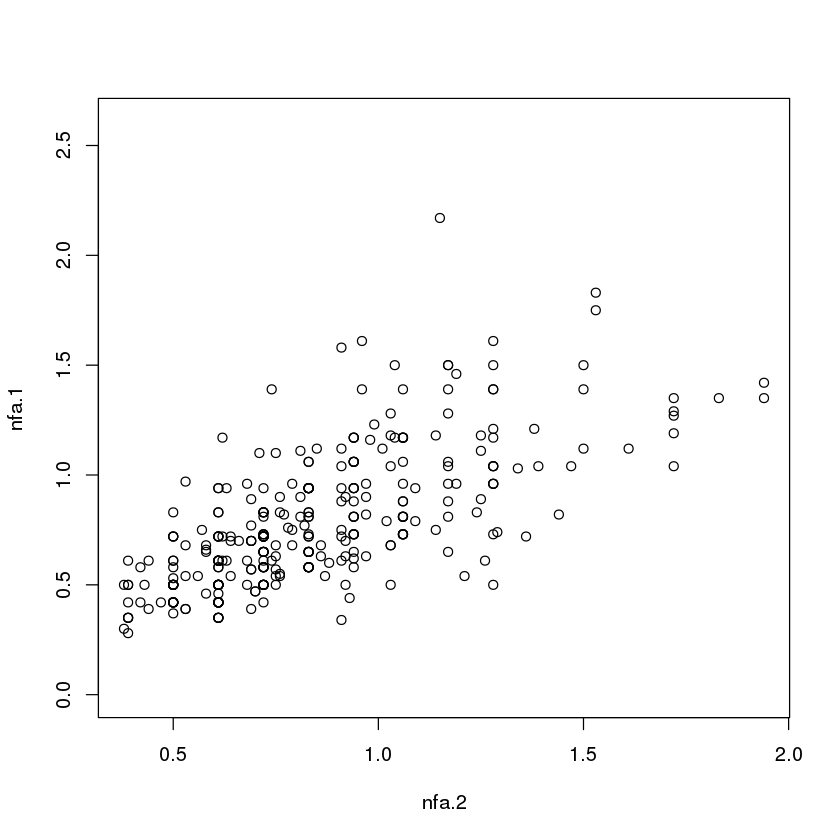

In [65]:
plot(nfa.1~nfa.2, data = recgli)

In [66]:
nfa.fit = lm(nfa.1~nfa.2, data = recgli)
summary(nfa.fit)


Call:
lm(formula = nfa.1 ~ nfa.2, data = recgli)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5904 -0.1339 -0.0383  0.1120  1.1721 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.17888    0.03673   4.871 1.73e-06 ***
nfa.2        0.71215    0.04090  17.413  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2217 on 329 degrees of freedom
  (313 observations deleted due to missingness)
Multiple R-squared:  0.4796,	Adjusted R-squared:  0.478 
F-statistic: 303.2 on 1 and 329 DF,  p-value: < 2.2e-16


In [67]:
preds.nfa = predict(nfa.fit, newdata = recgli[which(is.na(recgli$nfa.1) & !is.na(recgli$nfa.2)),])
head(preds.nfa)
recgli$nfa.1[match(names(preds.nfa), rownames(recgli))]=preds.nfa

197       201       292       295       298       333 
0.7058736 0.7842105 0.7842105 0.9123982 0.8269397 0.6132935

[1] 19

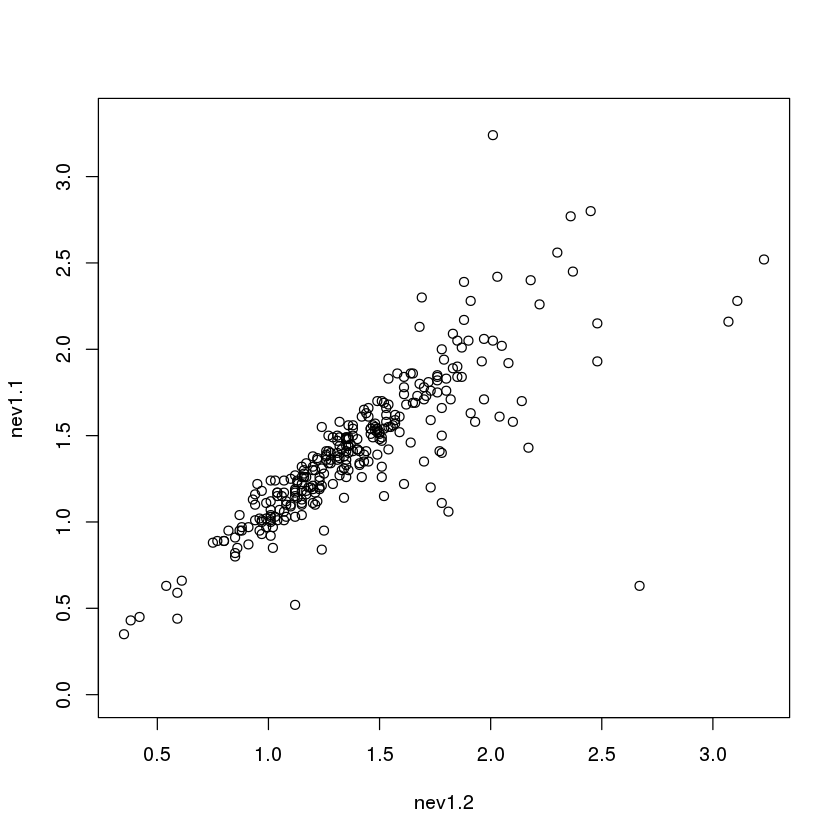

In [68]:
plot(nev1.1~nev1.2, data = recgli)
which(recgli$nev1.2>2.5 & recgli$nev1.1<1)
nev1.fit = lm(nev1.1~nev1.2, data = recgli[-19,])
nev1.preds = predict(nev1.fit, newdata = recgli[which(is.na(recgli$nev1.1) & !is.na(recgli$nev1.2)),])
recgli$nev1.1[match(names(nev1.preds), rownames(recgli))]=nev1.preds

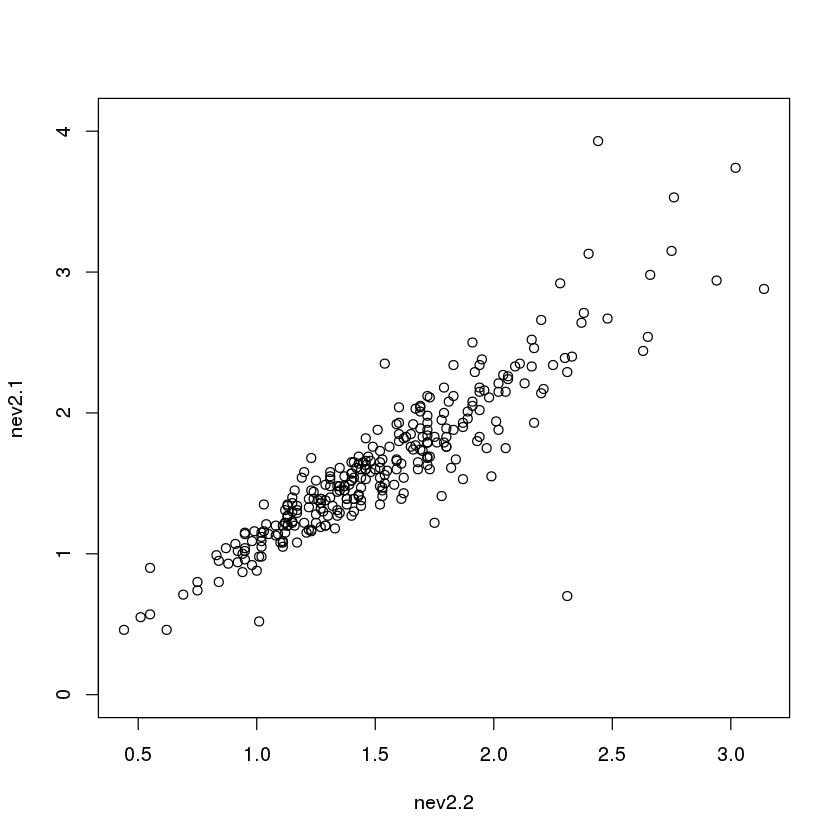

In [69]:
plot(nev2.1~nev2.2, data = recgli)
nev2.fit = lm(nev2.1~nev2.2, data = recgli[-19,])
nev2.preds = predict(nev2.fit, newdata = recgli[which(is.na(recgli$nev2.1) & !is.na(recgli$nev2.2)),])
recgli$nev2.1[match(names(nev2.preds), rownames(recgli))]=nev2.preds

In [70]:
nev3.fit = lm(nev3.1~nev3.2, data = recgli[-19,])
nev3.preds = predict(nev3.fit, newdata = recgli[which(is.na(recgli$nev3.1) & !is.na(recgli$nev3.2)),])
recgli$nev3.1[match(names(nev3.preds), rownames(recgli))]=nev3.preds

In [71]:
nevrad.fit = lm(nevrad.1~nevrad.2, data = recgli[-19,])
nevrad.preds = predict(nevrad.fit, newdata = recgli[which(is.na(recgli$nevrad.1) & !is.na(recgli$nevrad.2)),])
recgli$nevrad.1[match(names(nevrad.preds), rownames(recgli))]=nevrad.preds

In [72]:
write.csv(recgli, "6thAnnot_researchpath_withInVivo.csv", row.names=F)

## 7. Adds in output from get_igt_stats.ipynb, w/ %CEL, NEL, NEC & inclusion criteria (can be found in DataWrangling/GetMergeData/)

In [73]:
getwd()

[1] "/home/sf673542/DataWrangling/AnnotateData"

In [74]:
all_recgli = read.csv("6thAnnot_researchpath_withInVivo.csv")

In [75]:
## Now igt_stats.dev just came out, so I have to re-run everything to get the igt_stats output: 
## To re-run IGT stats, I will go back to GetMergeData & do it from there in a separate notebook.
## I ran this in get_igt_stats
## Hopefully this will be unnecessary in the future. 

In [76]:
biopsy_igt_stats_info = read.csv('../GetMergeData/Aug2018/igt_stats_information_forBiopsyAnnot.csv')

In [77]:
dim(biopsy_igt_stats_info)

[1] 654  11

In [78]:
dim(all_recgli)

[1] 644  60

In [79]:
all_recgli$roi.label = as.character(all_recgli$roi.label)
biopsy_igt_stats_info$roi.label = as.character(biopsy_igt_stats_info$roi.label)
biopsy_igt_stats_info = biopsy_igt_stats_info[,-1]

In [80]:
## getting rid of extraneous information: 
all_recgli = all_recgli[!is.na(all_recgli$roi.label),]
all_recgli = all_recgli[all_recgli$roi.label !="",]
biopsy_igt_stats_info = biopsy_igt_stats_info[!is.na(biopsy_igt_stats_info$roi.label),]
biopsy_igt_stats_info = biopsy_igt_stats_info[biopsy_igt_stats_info$roi.label != "",]
dim(all_recgli)
dim(biopsy_igt_stats_info)

[1] 619  60

[1] 629  10

In [81]:
recgli = left_join(all_recgli, biopsy_igt_stats_info, by = 'roi.label')
dim(recgli)

[1] 627  69

In [82]:
head(recgli)

b_number,t_number,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,roi.label,tumor_cell_evaluation,necrosis,f8_delicate,f8_simple,f8_complex,mib_1,bx_pure_treatment_effect,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,nadc.2,nfa.2,nev1.2,nev2.2,nev3.2,nevrad.2,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,olddata,newdata,comments,notes.,imaging_code,perf_quant,cbv_nlin,spec_quant,include_anat,include_diffu1000,include_diffu2000,include_diffu_all,include_perf,include_spec,include_one_advanced_mod,include_all_advanced_mods,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL,in_NEC,in_ROI
2723,6369,8122,9/13/09,9/14/09,Grade IV,Glioblastoma,10B28,0,0,2,1,0,0.82,t,2.10,1.84,1.20,0.84,1.31,0.75,1.19,1.28,1.58,1.45,NA,NA,NA,NA,NA,NA,0.66,0.81,0.79,100.00,4.98,3.28,0.24,1.65,0.53,0.41,-0.01,0.27,0.28,1,0,,NA,NA,,NA,0,1,1,0,1,1,1,1,1,53.85,46.15,NA,100.00,1,1,0,0,1
2312,5317,7679,5/4/08,5/4/08,Grade IV,Glioblastoma,11B16,2,1,2,3,0,3.31,f,2.27,1.44,1.88,0.78,1.92,0.68,1.63,1.93,2.34,2.14,1.91,1.03,1.91,1.87,1.88,1.92,2.24,2.25,2.25,98.51,1.56,0.30,0.75,0.86,0.84,0.46,0.61,1.08,0.47,1,0,,NA,NA,,NA,0,1,1,1,1,1,1,1,1,100.00,0.00,NA,100.00,1,1,0,0,1
2901,8089,8403,6/25/10,6/30/10,Grade IV,Glioblastoma,11B35,3,2,1,0,0,NA,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,biopsy_quant,biopsymask-nonexist,NA,NA,0,0,0,0,0,0,0,0,NA,NA,NA,NA,0,0,0,0,0
2474,7408,8701,3/23/11,3/24/11,Grade IV,Glioblastoma,11B40,,,,,,NA,,1.84,1.13,0.82,0.79,1.71,0.50,1.35,1.79,2.47,2.12,1.71,0.68,1.43,1.72,2.02,1.96,1.23,1.28,1.21,100.00,2.48,0.22,1.66,0.88,0.81,0.37,0.24,0.56,0.32,1,0,,NA,NA,,NA,0,1,1,1,1,1,1,1,1,8.70,13.04,NA,21.74,0,0,0,0,0
3169,7540,8796,6/19/11,6/20/11,Grade IV,Glioblastoma,11B43,2,0,3,0,0,17.00,f,2.35,1.97,0.76,0.78,1.34,0.68,1.13,1.34,1.63,1.50,NA,NA,NA,NA,NA,NA,0.58,0.67,0.60,100.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,,NA,NA,1,1,0,1,1,0,1,0,0.00,28.00,NA,28.00,0,1,1,0,1
2312,5317,7679,5/4/08,5/4/08,Grade IV,Glioblastoma,12B16,2,1,3,2,0,12.84,f,2.20,1.56,2.04,0.74,2.04,0.89,1.83,2.12,2.22,2.23,1.75,0.69,1.54,1.72,2.16,1.96,1.71,1.73,1.88,99.20,2.46,1.30,0.55,1.19,0.87,0.59,0.34,0.83,0.49,1,0,PP necrosis; some hyalinized BV; tissue is 2/3 tumor score of 3 and 1/3 score of 1,NA,NA,,NA,0,1,1,1,1,1,1,1,1,100.00,0.00,NA,100.00,1,1,0,0,1


In [83]:
write.csv(recgli, "7thAnnot_researchpath_withInVivo.csv", row.names = F )

## 8. Excludes ependymomas and other non-astro non-oligo HGGs (desired_hist) 


In [84]:
all_recgli = read.csv("7thAnnot_researchpath_withInVivo.csv")

In [85]:
desired_histology = ifelse(grepl("astrocytoma", all_recgli$current_hist_type, ignore.case = T) |
                             grepl("glioblastoma", all_recgli$current_hist_type, ignore.case = T)|
                             grepl("oligodendroglioma", all_recgli$current_hist_type, ignore.case = T) |
                             grepl("gliosarcoma", all_recgli$current_hist_type, ignore.case = T) |
                             grepl("effect", all_recgli$current_hist_type, ignore.case = T), 1, 0)
dim(all_recgli)
all_recgli = data.frame(all_recgli, desired_hist = desired_histology)
colnames(all_recgli)

[1] 627  69

[1] "b_number"                  "t_number"                 
 [3] "sf_number"                 "current_scan_date"        
 [5] "current_surgery_date"      "current_hist_grade"       
 [7] "current_hist_type"         "roi.label"                
 [9] "tumor_cell_evaluation"     "necrosis"                 
[11] "f8_delicate"               "f8_simple"                
[13] "f8_complex"                "mib_1"                    
[15] "bx_pure_treatment_effect"  "nfse"                     
[17] "nfl"                       "nt1c"                     
[19] "nt1v"                      "nadc.1"                   
[21] "nfa.1"                     "nev1.1"                   
[23] "nev2.1"                    "nev3.1"                   
[25] "nevrad.1"                  "nadc.2"                   
[27] "nfa.2"                     "nev1.2"                   
[29] "nev2.2"                    "nev3.2"                   
[31] "nevrad.2"                  "cbvn_nlin"                
[33] "phn_nlin"                  "phn_npar"                 
[35] "recovn_npar"               "cni"                      
[37] "ccri"                      "crni"                     
[39] "ncho"                      "ncre"                     
[41] "nnaa"                      "nlip"                     
[43] "laclip"                    "nlac"                     
[45] "olddata"                   "newdata"                  
[47] "comments"                  "notes."                   
[49] "imaging_code"              "perf_quant"               
[51] "cbv_nlin"                  "spec_quant"               
[53] "include_anat"              "include_diffu1000"        
[55] "include_diffu2000"         "include_diffu_all"        
[57] "include_perf"              "include_spec"             
[59] "include_one_advanced_mod"  "include_all_advanced_mods"
[61] "X.CEL"                     "X.NEL"                    
[63] "X.NEC"                     "sum"                      
[65] "in_CEL"                    "in_T2all"                 
[67] "in_NEL"                    "in_NEC"                   
[69] "in_ROI"                    "desired_hist"

In [86]:
all_recgli = write.csv(all_recgli, "8thAnnot_researchpath_withInVivo.csv", row.names = F)

## 9. Creates outcome labels (multnom_out), adds necrosis, makes PN category (pathologically normal) that are in CEL or in the NEL region labeled TxE 

In [87]:
all_recgli = read.csv("8thAnnot_researchpath_withInVivo.csv")

In [88]:
dim(all_recgli)

[1] 627  70

In [89]:
all_recgli = data.frame(all_recgli, multnom_out = NA)## start by labeling all w/ TS = 0 PN and then label those that have chars of txe as such 

#### Start by labeling all w/ TS = 0 PN and then label those that have chars of txe as such 


In [90]:
all_recgli$multnom_out[grep("0", all_recgli$tumor_cell_evaluation)]="PN"

Here i want to find all the biopsies with information using any of the keywords:  
"microglia" "glia" "yalinized" "reactive" "RX" "gliosis" "treatment effect" "tx effect"
"hyalin" "inflammation" 

In [91]:
txe_keyword_search = c(grep("glia", all_recgli$comments, ignore.case = T), 
                       grep("yalin", all_recgli$comments,ignore.case = T),
                       grep("reactive", all_recgli$comments, ignore.case = T),
                       grep("rx", all_recgli$comments, ignore.case = T), 
                       grep("gliosis", all_recgli$comments, ignore.case = T), 
                       grep("effect", all_recgli$comments, ignore.case = T),
                       grep("inflammation", all_recgli$comments, ignore.case = T)) 
ts0 = grep("0", all_recgli$tumor_cell_evaluation)

In [92]:
txe_probably = intersect(grep(1, all_recgli$olddata), grep("t", all_recgli$bx_pure_treatment_effect))
all_recgli$multnom_out[txe_probably]="TxE"
## using the intersection of those w/ ts 0 and have a keyword that matches TxE eval
all_recgli$multnom_out[intersect(ts0, txe_keyword_search)]="TxE"
## labeling TS = 1 (to exclude from analysis)
all_recgli$multnom_out[grep("1", all_recgli$tumor_cell_evaluation)]="Ts1DNI"
## labeling noFFPE 
no_ffpe = ifelse(grepl("FFPE", all_recgli$comments) | grepl("FFPE", all_recgli$notes.), 1, 0)
all_recgli = data.frame(all_recgli, no_ffpe = no_ffpe)
all_recgli$multnom_out[grep(1, all_recgli$no_ffpe)]="noFFPEDNI"
## labeling Indeterminables 
all_recgli$multnom_out[grep("Ind", all_recgli$tumor_cell_evaluation)]="IndDNI"
## labeling rHGG
all_recgli$multnom_out[grep("2", all_recgli$tumor_cell_evaluation)]="rHGG"
all_recgli$multnom_out[grep("3", all_recgli$tumor_cell_evaluation)]="rHGG"
table(all_recgli$multnom_out)
table(is.na(all_recgli$multnom_out))
# FALSE 539, TRUE 81 
## labeling no path_report on box 
all_recgli$multnom_out[grep("path_report", all_recgli$notes.)]="dneDNI"
all_recgli$multnom_out[all_recgli$tumor_cell_evaluation==""]="dneDNI"
table(all_recgli$multnom_out)
dim(all_recgli)


   IndDNI noFFPEDNI        PN      rHGG    Ts1DNI       TxE 
       16        22        51       337        73        72 


FALSE  TRUE 
  571    56 


dneDNI IndDNI     PN   rHGG Ts1DNI    TxE 
    87     15     51    332     70     72 

[1] 627  72

So there are currently still 86 biopsies that need to be annotated; Now let's create a column called "waiting_on_path" 

In [93]:
all_recgli = data.frame(all_recgli, waiting_on_path=ifelse(all_recgli$multnom_out=="dneDNI", 1, 0))

In [94]:
table(all_recgli$waiting_on_path)
dim(all_recgli)


  0   1 
540  87 

[1] 627  73

#### Adding in necrosis to the multnom_out: 

In [95]:
all_recgli$multnom_out = ifelse(is.na(all_recgli$necrosis) | all_recgli$necrosis !=2, as.character(all_recgli$multnom_out), "NecDNI")
table(all_recgli$multnom_out)


dneDNI IndDNI NecDNI     PN   rHGG Ts1DNI    TxE 
    83     10     36     51    320     69     58 

In [96]:
dim(all_recgli)
dim(all_recgli[is.na(all_recgli$multnom_out),]) ## zero w/ no outcome code, let's keep going: 

[1] 627  73

[1]  0 73

#### Need to account for PNs that are actually in CEL or NEL 

In [97]:
PN = subset(all_recgli, all_recgli$multnom_out == "PN")
PN.txe = subset(PN, PN$in_CEL==1 | PN$in_NEL ==1)
dim(PN.txe)
table(!duplicated(PN.txe$t_number)) ##number of potential new TxE samples

[1] 33 73


FALSE  TRUE 
    6    27 

In [98]:
PN.txe$multnom_out = "TxE"

In [99]:
table(all_recgli$multnom_out)


dneDNI IndDNI NecDNI     PN   rHGG Ts1DNI    TxE 
    83     10     36     51    320     69     58 

In [100]:
all_recgli$multnom_out[all_recgli$roi.label %in% PN.txe$roi.label]="TxE"

In [101]:
table(all_recgli$multnom_out)


dneDNI IndDNI NecDNI     PN   rHGG Ts1DNI    TxE 
    83     10     36     18    320     69     91 

In [102]:
write.csv(all_recgli, file = "9thAnnot_researchpath_withInVivo.csv", row.names = F )

## 10. Adds in binary operator to include the data only if it's rHGG or TxE 

In [103]:
recgli = read.csv("9thAnnot_researchpath_withInVivo.csv")

In [104]:
dim(recgli)

[1] 627  73

In [105]:
colnames(recgli)

[1] "b_number"                  "t_number"                 
 [3] "sf_number"                 "current_scan_date"        
 [5] "current_surgery_date"      "current_hist_grade"       
 [7] "current_hist_type"         "roi.label"                
 [9] "tumor_cell_evaluation"     "necrosis"                 
[11] "f8_delicate"               "f8_simple"                
[13] "f8_complex"                "mib_1"                    
[15] "bx_pure_treatment_effect"  "nfse"                     
[17] "nfl"                       "nt1c"                     
[19] "nt1v"                      "nadc.1"                   
[21] "nfa.1"                     "nev1.1"                   
[23] "nev2.1"                    "nev3.1"                   
[25] "nevrad.1"                  "nadc.2"                   
[27] "nfa.2"                     "nev1.2"                   
[29] "nev2.2"                    "nev3.2"                   
[31] "nevrad.2"                  "cbvn_nlin"                
[33] "phn_nlin"                  "phn_npar"                 
[35] "recovn_npar"               "cni"                      
[37] "ccri"                      "crni"                     
[39] "ncho"                      "ncre"                     
[41] "nnaa"                      "nlip"                     
[43] "laclip"                    "nlac"                     
[45] "olddata"                   "newdata"                  
[47] "comments"                  "notes."                   
[49] "imaging_code"              "perf_quant"               
[51] "cbv_nlin"                  "spec_quant"               
[53] "include_anat"              "include_diffu1000"        
[55] "include_diffu2000"         "include_diffu_all"        
[57] "include_perf"              "include_spec"             
[59] "include_one_advanced_mod"  "include_all_advanced_mods"
[61] "X.CEL"                     "X.NEL"                    
[63] "X.NEC"                     "sum"                      
[65] "in_CEL"                    "in_T2all"                 
[67] "in_NEL"                    "in_NEC"                   
[69] "in_ROI"                    "desired_hist"             
[71] "multnom_out"               "no_ffpe"                  
[73] "waiting_on_path"

In [106]:
recgli = data.frame(recgli, rhgg_txe_analysis = ifelse(recgli$multnom_out == "rHGG" | recgli$multnom_out == "TxE", 1, 0))

In [107]:
dim(recgli)

[1] 627  74

In [108]:
table(recgli$rhgg_txe_analysis)


  0   1 
216 411 

In [109]:
write.csv(recgli, file = "10thAnnot_researchPath_withInVivo.csv", row.names = F)